### Подопригорова С.С. ИУ5-24М
Вариант 10

__Задача №10.__

Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

__Задача №30.__

Для набора данных проведите удаление повторяющихся признаков.

Для студентов группы ИУ5-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

In [2]:
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

# Задача 10

In [3]:
data = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])

In [8]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

In [9]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [5]:
total_count = data.shape[0]
cat_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка WindGustDir. Тип данных object. Количество пустых значений 9330, 6.56%.
Колонка WindDir9am. Тип данных object. Количество пустых значений 10013, 7.04%.
Колонка WindDir3pm. Тип данных object. Количество пустых значений 3778, 2.66%.
Колонка RainToday. Тип данных object. Количество пустых значений 1406, 0.99%.


In [11]:
data_fill, _, _ = impute_column(data, 'WindDir9am', 'most_frequent')

In [19]:
data_new = data.copy()
data_new['WindDir9am'] = data_fill

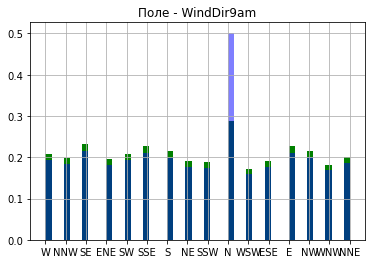

In [20]:
plot_hist_diff(data, data_new, ['WindDir9am'])

# Задача 30

In [21]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    pairs = {}
    dups = []
    for i in range(X.shape[1]):
        feat_outer = X.columns[i]
        if feat_outer not in dups:
            pairs[feat_outer] = []
            for feat_inner in X.columns[i + 1:]:
                if X[feat_outer].equals(X[feat_inner]):
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

Создадим искусственный набор данных с повторяющимися признаками

In [26]:
lst_arr = [ [21,1,21,1,3,1], 
            [22,2,22,2,3,2], 
            [23,3,23,3,3,3], 
            [24,4,24,4,3,4],
            [29,9,29,4,3,9],                
            [31,6,31,4,3,6] ]
arr = np.array(lst_arr)
data2 = pd.DataFrame(arr_1212, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])
data2

,f1,f2,f3,f4,f5,f6,f7
0,21,1,2,21,1,3,1
1,22,2,2,22,2,3,2
2,23,3,2,23,3,3,3
3,24,4,2,24,4,3,4
4,29,9,2,29,4,3,9
5,31,6,2,31,4,3,6


In [28]:
get_duplicates(data2)

{'f1': ['f4'], 'f2': ['f7'], 'f3': [], 'f5': [], 'f6': []}

In [30]:
data2 = data2.drop(['f4'], axis = 1)
data2 = data2.drop(['f7'], axis = 1)
data2

,f1,f2,f3,f5,f6
0,21,1,2,1,3
1,22,2,2,2,3
2,23,3,2,3,3
3,24,4,2,4,3
4,29,9,2,4,3
5,31,6,2,4,3


In [31]:
get_duplicates(data2)

{'f1': [], 'f2': [], 'f3': [], 'f5': [], 'f6': []}

Теперь повторяющихся признаков нет

# Скрипичная диаграмма 

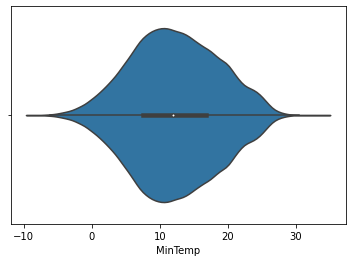

In [7]:
sns.violinplot(x=data['MinTemp'])